In [1]:
import ccxt
import numpy as np
import pandas as pd
import datetime as dt
from dateutil import tz
import matplotlib.pyplot as plt

import json
import time
import os
import sys

In [2]:
src_path = '../src/'
sys.path.append(os.path.abspath(src_path))
from func_get import *
from func_signal import *
from func_backtest import *

In [3]:
start_ts = time.time()

In [4]:
interval_dict = {
    '1m': 1,
    '5m': 5,
    '15m': 15,
    '30m': 30,
    '1h': 60,
    '2h': 120,
    '4h': 240,
    '1d': 1440
}

In [5]:
with open('../../../_keys/ftx/ftx_read_keys.json') as keys_file:
    keys_dict = json.load(keys_file)
    
exchange = ccxt.ftx({'apiKey': keys_dict['apiKey'],
                     'secret': keys_dict['secret'],
                     'enableRateLimit': True})

### Config

In [6]:
project_name = 'cryptoris_30m'

In [7]:
start_date = dt.datetime(2022, 1, 1)
start_hour = 0
end_date = dt.datetime.today() - dt.timedelta(days=1)
reinvest_profit_flag = True

In [8]:
config_params = {
    'safety_ohlcv_range': 1000,
    'action_timeframe': '30m',
    'target_side': ['buy', 'sell'],
    'base': {
        'symbol': ['ETH-PERP', 'SOL-PERP', 'LUNA-PERP'],
        'open': {
            '30m': {
                'ema': {
                    'check': [check_signal_side],
                    'look_back': 1,
                    'windows': 200,
                    'revert': False
                },
                'supertrend': {
                    'check': [check_signal_side_change],
                    'look_back': 1,
                    'atr_range': 10,
                    'multiplier': 3,
                    'revert': False
                },
                'wt': {
                    'check': [check_signal_band],
                    'trigger': 'inner',
                    'channel_range': 10,
                    'average_range': 21,
                    'overbought': 53,
                    'oversold': -53,
                    'revert': False
                }
            },
            '1h': {
                'ema': {
                    'check': [check_signal_side],
                    'look_back': 1,
                    'windows': 200,
                    'revert': False
                },
                'supertrend': {
                    'check': [check_signal_side],
                    'look_back': 1,
                    'atr_range': 10,
                    'multiplier': 3,
                    'revert': False
                },
                'wt': {
                    'check': [check_signal_band],
                    'trigger': 'inner',
                    'channel_range': 10,
                    'average_range': 21,
                    'overbought': 53,
                    'oversold': -53,
                    'revert': False
                }        
            }    
            
        },
        'close': {
            '30m': {
                'supertrend': {
                    'check': [check_signal_side],
                    'look_back': 0,
                    'atr_range': 10,
                    'multiplier': 3,
                    'revert': False
                },
                'wt': {
                    'check': [check_signal_band],
                    'trigger': 'inner',
                    'channel_range': 10,
                    'average_range': 21,
                    'overbought': 53,
                    'oversold': -53,
                    'revert': False
                }    
            }
        }
    },
    'lead': {
        'symbol': ['BTC-PERP'],
        'open': {
            '30m': {
                'wt': {
                    'check': [check_signal_band],
                    'trigger': 'inner',
                    'channel_range': 10,
                    'average_range': 21,
                    'overbought': 53,
                    'oversold': -53,
                    'revert': False
                }
            }
        },
        'close': {
        }
    },
    'tp': {
        'stop_percent': 50,
        'price_percent': 5,
        'signal': None,
    },
    'sl': {
        'stop_percent': 50,
        'price_percent': None,
        'signal': {
            'timeframe': '30m',
            'signal': {
                'supertrend': {
                    'look_back': 0,
                    'atr_range': 10,
                    'multiplier': 3,
                    'revert': False
                }
            }
        }
    },
    'action_percent': 10,
    'leverage': 5,
    'taker_fee_percent': 0.07
}

### Get data

In [9]:
ohlcv_df_dict = get_data(exchange, start_date, end_date, start_hour, interval_dict, config_params)

base: timeframe 1/2 symbol 1/3 date 1/138
base: timeframe 1/2 symbol 1/3 date 2/138
base: timeframe 1/2 symbol 1/3 date 3/138
base: timeframe 1/2 symbol 1/3 date 4/138
base: timeframe 1/2 symbol 1/3 date 5/138
base: timeframe 1/2 symbol 1/3 date 6/138
base: timeframe 1/2 symbol 1/3 date 7/138
base: timeframe 1/2 symbol 1/3 date 8/138
base: timeframe 1/2 symbol 1/3 date 9/138
base: timeframe 1/2 symbol 1/3 date 10/138
base: timeframe 1/2 symbol 1/3 date 11/138
base: timeframe 1/2 symbol 1/3 date 12/138
base: timeframe 1/2 symbol 1/3 date 13/138
base: timeframe 1/2 symbol 1/3 date 14/138
base: timeframe 1/2 symbol 1/3 date 15/138
base: timeframe 1/2 symbol 1/3 date 16/138
base: timeframe 1/2 symbol 1/3 date 17/138
base: timeframe 1/2 symbol 1/3 date 18/138
base: timeframe 1/2 symbol 1/3 date 19/138
base: timeframe 1/2 symbol 1/3 date 20/138
base: timeframe 1/2 symbol 1/3 date 21/138
base: timeframe 1/2 symbol 1/3 date 22/138
base: timeframe 1/2 symbol 1/3 date 23/138
base: timeframe 1/2 

base: timeframe 1/2 symbol 2/3 date 54/138
base: timeframe 1/2 symbol 2/3 date 55/138
base: timeframe 1/2 symbol 2/3 date 56/138
base: timeframe 1/2 symbol 2/3 date 57/138
base: timeframe 1/2 symbol 2/3 date 58/138
base: timeframe 1/2 symbol 2/3 date 59/138
base: timeframe 1/2 symbol 2/3 date 60/138
base: timeframe 1/2 symbol 2/3 date 61/138
base: timeframe 1/2 symbol 2/3 date 62/138
base: timeframe 1/2 symbol 2/3 date 63/138
base: timeframe 1/2 symbol 2/3 date 64/138
base: timeframe 1/2 symbol 2/3 date 65/138
base: timeframe 1/2 symbol 2/3 date 66/138
base: timeframe 1/2 symbol 2/3 date 67/138
base: timeframe 1/2 symbol 2/3 date 68/138
base: timeframe 1/2 symbol 2/3 date 69/138
base: timeframe 1/2 symbol 2/3 date 70/138
base: timeframe 1/2 symbol 2/3 date 71/138
base: timeframe 1/2 symbol 2/3 date 72/138
base: timeframe 1/2 symbol 2/3 date 73/138
base: timeframe 1/2 symbol 2/3 date 74/138
base: timeframe 1/2 symbol 2/3 date 75/138
base: timeframe 1/2 symbol 2/3 date 76/138
base: timef

base: timeframe 1/2 symbol 3/3 date 107/138
base: timeframe 1/2 symbol 3/3 date 108/138
base: timeframe 1/2 symbol 3/3 date 109/138
base: timeframe 1/2 symbol 3/3 date 110/138
base: timeframe 1/2 symbol 3/3 date 111/138
base: timeframe 1/2 symbol 3/3 date 112/138
base: timeframe 1/2 symbol 3/3 date 113/138
base: timeframe 1/2 symbol 3/3 date 114/138
base: timeframe 1/2 symbol 3/3 date 115/138
base: timeframe 1/2 symbol 3/3 date 116/138
base: timeframe 1/2 symbol 3/3 date 117/138
base: timeframe 1/2 symbol 3/3 date 118/138
base: timeframe 1/2 symbol 3/3 date 119/138
base: timeframe 1/2 symbol 3/3 date 120/138
base: timeframe 1/2 symbol 3/3 date 121/138
base: timeframe 1/2 symbol 3/3 date 122/138
base: timeframe 1/2 symbol 3/3 date 123/138
base: timeframe 1/2 symbol 3/3 date 124/138
base: timeframe 1/2 symbol 3/3 date 125/138
base: timeframe 1/2 symbol 3/3 date 126/138
base: timeframe 1/2 symbol 3/3 date 127/138
base: timeframe 1/2 symbol 3/3 date 128/138
base: timeframe 1/2 symbol 3/3 d

base: timeframe 2/2 symbol 2/3 date 21/138
base: timeframe 2/2 symbol 2/3 date 22/138
base: timeframe 2/2 symbol 2/3 date 23/138
base: timeframe 2/2 symbol 2/3 date 24/138
base: timeframe 2/2 symbol 2/3 date 25/138
base: timeframe 2/2 symbol 2/3 date 26/138
base: timeframe 2/2 symbol 2/3 date 27/138
base: timeframe 2/2 symbol 2/3 date 28/138
base: timeframe 2/2 symbol 2/3 date 29/138
base: timeframe 2/2 symbol 2/3 date 30/138
base: timeframe 2/2 symbol 2/3 date 31/138
base: timeframe 2/2 symbol 2/3 date 32/138
base: timeframe 2/2 symbol 2/3 date 33/138
base: timeframe 2/2 symbol 2/3 date 34/138
base: timeframe 2/2 symbol 2/3 date 35/138
base: timeframe 2/2 symbol 2/3 date 36/138
base: timeframe 2/2 symbol 2/3 date 37/138
base: timeframe 2/2 symbol 2/3 date 38/138
base: timeframe 2/2 symbol 2/3 date 39/138
base: timeframe 2/2 symbol 2/3 date 40/138
base: timeframe 2/2 symbol 2/3 date 41/138
base: timeframe 2/2 symbol 2/3 date 42/138
base: timeframe 2/2 symbol 2/3 date 43/138
base: timef

base: timeframe 2/2 symbol 3/3 date 74/138
base: timeframe 2/2 symbol 3/3 date 75/138
base: timeframe 2/2 symbol 3/3 date 76/138
base: timeframe 2/2 symbol 3/3 date 77/138
base: timeframe 2/2 symbol 3/3 date 78/138
base: timeframe 2/2 symbol 3/3 date 79/138
base: timeframe 2/2 symbol 3/3 date 80/138
base: timeframe 2/2 symbol 3/3 date 81/138
base: timeframe 2/2 symbol 3/3 date 82/138
base: timeframe 2/2 symbol 3/3 date 83/138
base: timeframe 2/2 symbol 3/3 date 84/138
base: timeframe 2/2 symbol 3/3 date 85/138
base: timeframe 2/2 symbol 3/3 date 86/138
base: timeframe 2/2 symbol 3/3 date 87/138
base: timeframe 2/2 symbol 3/3 date 88/138
base: timeframe 2/2 symbol 3/3 date 89/138
base: timeframe 2/2 symbol 3/3 date 90/138
base: timeframe 2/2 symbol 3/3 date 91/138
base: timeframe 2/2 symbol 3/3 date 92/138
base: timeframe 2/2 symbol 3/3 date 93/138
base: timeframe 2/2 symbol 3/3 date 94/138
base: timeframe 2/2 symbol 3/3 date 95/138
base: timeframe 2/2 symbol 3/3 date 96/138
base: timef

lead: timeframe 1/1 symbol 1/1 date 126/138
lead: timeframe 1/1 symbol 1/1 date 127/138
lead: timeframe 1/1 symbol 1/1 date 128/138
lead: timeframe 1/1 symbol 1/1 date 129/138
lead: timeframe 1/1 symbol 1/1 date 130/138
lead: timeframe 1/1 symbol 1/1 date 131/138
lead: timeframe 1/1 symbol 1/1 date 132/138
lead: timeframe 1/1 symbol 1/1 date 133/138
lead: timeframe 1/1 symbol 1/1 date 134/138
lead: timeframe 1/1 symbol 1/1 date 135/138
lead: timeframe 1/1 symbol 1/1 date 136/138
lead: timeframe 1/1 symbol 1/1 date 137/138
lead: timeframe 1/1 symbol 1/1 date 138/138


### Add signal

In [10]:
ohlcv_df_dict = add_signal(start_date, ohlcv_df_dict, interval_dict, config_params)

base add ema to ETH-PERP 30m
base add supertrend to ETH-PERP 30m
base add wt to ETH-PERP 30m
base add ema to SOL-PERP 30m
base add supertrend to SOL-PERP 30m
base add wt to SOL-PERP 30m
base add ema to LUNA-PERP 30m
base add supertrend to LUNA-PERP 30m
base add wt to LUNA-PERP 30m
base add ema to ETH-PERP 1h
base add supertrend to ETH-PERP 1h
base add wt to ETH-PERP 1h
base add ema to SOL-PERP 1h
base add supertrend to SOL-PERP 1h
base add wt to SOL-PERP 1h
base add ema to LUNA-PERP 1h
base add supertrend to LUNA-PERP 1h
base add wt to LUNA-PERP 1h
lead add wt to BTC-PERP 30m


### Back test

In [11]:
action_time_list = gen_action_time_list(config_params, ohlcv_df_dict)
max_open_timeframe = get_max_open_timeframe(config_params, interval_dict)

In [12]:
budget = 100

transaction_dict = {
    'symbol': [],
    'side': [],
    'amount': [],
    'open_time': [],
    'open_price': [],
    'close_time': [],
    'close_price': [],
    'value': [],
    'notional': [],
    'profit': [],
    'profit_percent': []
}

position_dict = {}

if reinvest_profit_flag == True:
    budget_dict = {
        'time': [],
        'budget': []
    }
    
max_drawdown = 0

In [13]:
if reinvest_profit_flag == True:
    min_budget = budget

time_count = 0

for signal_time in action_time_list:
    action_time = signal_time + dt.timedelta(minutes=interval_dict[config_params['action_timeframe']])
    
    time_count += 1
    print(f"Time {action_time}: progress {time_count}/{len(action_time_list)}")

    '''
    Close positions
    '''
    for symbol in [x for x in position_dict.keys()]:
        print(f"  {symbol}")
        budget, max_drawdown, position_dict, transaction_dict = close_position(symbol, signal_time, max_drawdown, config_params, budget, reinvest_profit_flag, ohlcv_df_dict, position_dict, transaction_dict, interval_dict)

    '''
    Open positions
    '''
    max_position = int(1 / (config_params['action_percent'] / 100))

    for symbol in [x for x in config_params['base']['symbol'] if x not in position_dict.keys()][:max_position]:
        print(f"  {symbol}")
        position_dict = open_position(symbol, signal_time, max_open_timeframe, config_params, budget, ohlcv_df_dict, position_dict, interval_dict)    
    
    '''
    Update budget
    '''
    if reinvest_profit_flag == True:
        budget_dict['time'].append(signal_time)
        budget_dict['budget'].append(budget)

        if budget < min_budget:
            min_budget = budget

    if budget <= 0:
        print(f"Out of money at {action_time}")
        break
        
'''
Clear final position
'''
opened_symbol = list(position_dict.keys())

for symbol in opened_symbol:
    print(f" Clear {symbol} position")
    
    side = position_dict[symbol]['side']
    ohlcv_df = ohlcv_df_dict['base'][config_params['action_timeframe']][symbol]
    current_ohlcv_df = ohlcv_df[ohlcv_df['time'] == signal_time].reset_index(drop=True)
    close_price = current_ohlcv_df.loc[0, 'close']
    close_percent = 100
    
    budget, position_dict, transaction_dict = update_close_position(symbol, side, close_price, close_percent, signal_time, config_params, budget, reinvest_profit_flag, position_dict, transaction_dict, interval_dict)

Time 2022-01-01 00:30:00: progress 1/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: sell
     base LUNA-PERP check_signal_band 

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-01 16:00:00: progress 32/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-02 17:00:00: progress 82/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_ban

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-03 05:30:00: progress 107/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP c

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-03 17:30:00: progress 131/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP 

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-04 06:30:00: progress 157/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base S

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-04 20:30:00: progress 185/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base S

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-05 09:30:00: progress 211/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_b

     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-05 22:00:00: progress 236/4608
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base S

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-06 11:00:00: progress 262/4608
  ETH-PERP
     base ETH-

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-06 23:00:00: progress 286/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     bas

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-07 14:30:00: progress 317/4608
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     ba

     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-08 06:00:00: progress 348/4608
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 73.26243921660392
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_s

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-08 20:30:00: progress 377/4608
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     b

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-09 09:00:00: progress 402/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_b

     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-09 20:30:00: progress 425/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PE

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-10

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-11 00:00:00: progress 480/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_s

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-11 23:30:00: progress 527/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: buy
     base SOL-PERP check_signal_band wt 30m: buy
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-12 12:00:00: progress 552/4608
  ETH-PERP
     base ETH-PER

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-13 02:00:00: progress 580/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_ba

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-13 14:00:00: progress 604/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-14 02:00:00: progress 628/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL

     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-14 13:30:00: progress 651/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-P

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-15 01:30:00: progress 675/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-15 13:30:00: progress 699/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP 

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-16 05:00:00: progress 730/4608
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     b

     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-16 18:30:00: progress 757/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP c

     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-17 09:00:00: progress 786/4608
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
  

     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-17 21:30:00: progress 811/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-P

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-18 08:30:00: progress 833/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     bas

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-18 22:30:00: progress 861/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_ba

     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     ba

     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-19 23:30:00: progress 911/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band 

     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-20 11:30:00: progress 935/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band w

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-20 22:30:00: progress 957/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-21 12:30:00: progress 985/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP che

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-22 14:00:00: progress 1036/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-23 12:00:00: progress 1080/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SO

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-24 02:30:00: progress 1109/4608
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 2500.259451413225
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 101.7431048642238
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_sig

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-24 17:30:00: progress 1139/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-25 05:30:00: progress 1163/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_sign

     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     ba

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP che

     base ETH-PERP check_signal_band wt 30m: sell
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_ban

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-27 14:30:00: progress 1277/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     

     base ETH-PERP check_signal_side_change supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     sell: 0.02359250005756426
     price: 2395.1
     tp: 2275.345
     sl: 2504.534312958929
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-28 03:30:00: progress 1303/4608
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not 

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-28 17:30:00: progress 1331/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PER

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-29 16:00:00: progress 1376/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band 

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-30 05:00:00: progress 1402/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base E

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-30 18:30:00: progress 1429/4608
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead B

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-31 06:00:00: progress 1452/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PER

     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUN

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-02 04:00:00: progress 1544/4608
  ETH-PERP
     base ETH-PE

     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-02 15:30:00: progress 1567/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP ch

     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base L

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-03 12:30:00: progress 1609/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base L

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-04 00:30:00: progress 1633/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     ba

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-05 00:00:00: progress 1680/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: se

     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-05 11:30:00: progress 1703/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band w

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-05 22:00:00: progress 1724/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supe

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-06 08:00:00: progress 1744/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP chec

     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-06 19:30:00: progress 1767/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP 

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-07 06:30:00: progress 1789/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_ba

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-07 19:00:00: progress 1814/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side s

     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-08 06:30:00: progress 1837/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band 

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-08 17:30:00: progress 1859/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_sid

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-09 03:30:00: progress 1879/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_si

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-09 15:00:00: progress 1902/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_ba

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-10 02:00:00: progress 1924/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SO

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-10 13:30:00: progress 1947/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP 

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-11 01:30:00: progress 1971/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-11 14:00:00: progress 1996/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-12 01:30:00: progress 2019/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-12 12:30:00: progress 2041/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-12 23:00:00: progress 2062/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base S

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-13 11:00:00: progress 2086/4608
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
 

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-13 23:30:00: progress 2111/4608
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     sell: 0.580884232721766
     price: 94.16
     tp: 89.452
     sl: 97.14285907856187
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     base LUNA-PERP check_signal_side ema 1h: sell
   

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-14 13:30:00: progress 2139/4608
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 2918.389123353253
  SOL-PERP
     base SOL-PERP

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-15 02:00:00: progress 2164/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-15 14:00:00: progress 2188/4608
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base

     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-16 01:00:00: progress 2210/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP ch

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-16 12:30:00: progress 2233/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supe

     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-16 23:00:00: progress 2254/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PE

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-17 11:00:00: progress 2278/4608
  ETH-PERP
     Stop loss at 3084.376396112476
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     sell: 0.5333078402161396
     price: 99.205
     tp: 94.24475
     sl: 102.73650297534485
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PE

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-18 00:00:00: progress 2304/4608
  ETH-PERP
     base ET

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-18 11:00:00: progress 2326/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base 

     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-18 21:30:00: progress 2347/4608
  ETH-PERP
     ba

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-19 08:30:00: progress 2369/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-19 19:30:00: progress 2391/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base 

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-20 05:30:00: progress 2411/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signa

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-20 16:30:00: progress 2433/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal

     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-21 03:30:00: progress 2455/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-21 13:30:00: progress 2475/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PE

     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-22 02:30:00: progress 2501/4608
  SOL-PERP
   

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-22 14:30:00: progress 2525/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_s

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-23 11:30:00: progress 2567/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ET

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-23 22:30:00: progress 2589/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ET

     base LUNA-PERP check_signal_band wt 30m: sell
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-24 08:30:00: progress 2609/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side sup

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-24 20:00:00: progress 2632/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_sign

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base L

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-25 17:30:00: progress 2675/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PE

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-26 03:30:00: progress 2695/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PER

     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-26 15:00:00: progress 2718/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 3

     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-27 02:00:00: progress 2740/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-27 12:30:00: progress 2761/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base 

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-27 22:30:00: progress 2781/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP c

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-28 09:30:00: progress 2803/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     ba

     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-28 19:30:00: progress 2823/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base S

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-01 07:00:00: progress 2846/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-01 18:00:00: progress 2868/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PER

     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-02 04:00:00: progress 2888/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m

     base ETH-PERP check_signal_band wt 30m: buy
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-02 15:00:00: progress 2910/4608
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_s

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-03 05:30:00: progress 2939/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supe

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-03 15:30:00: progress 2959/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP chec

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-04 03:00:00: progress 2982/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base 

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-04 13:30:00: progress 3003/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-04 23:30:00: progress 3023/4608
  ETH-PERP
     base E

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_s

     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-05 20:30:00: progress 3065/4608
  ETH-PERP
     bas

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-06 06:00:00: progress 3084/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA

     base LUNA-PERP check_signal_band wt 30m: buy
     Closed by signal at 82.631
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-07 03:30:00: progress 3127/4608
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 84.32147941032584
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PER

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-07 14:30:00: progress 3149/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_ba

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-08 00:30:00: progress 3169/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-08 18:00:00: progress 3204/4608
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
 

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-09 05:30:00: progress 3227/4608
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 84.56541411294545
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP c

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-09 17:00:00: progress 3250/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-10 03:00:00: progress 3270/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_ba

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-10 13:00:00: progress 3290/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base E

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     buy: 0.5201953502937458
     price: 101.953
     tp: 107.05065
     sl: 93.62537462302001
Time 2022-03-10 23:00:00: progress 3310/4608
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
     Update sl: 94.613687160718
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action


     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-11 11:30:00: progress 3335/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-11 21:30:00: progress 3355/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ET

     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-12 09:00:00: progress 3378/4608
  SOL-PERP

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-12 20:30:00: progress 3401/4608
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-13 09:00:00: progress 3426/4608
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action


     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-13 19:30:00: progress 3447/4608
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 82.02632652012687
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-14 08:00:00: progress 3472/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LU

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base L

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-15 15:00:00: progress 3534/4608
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base 

     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP chec

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-16 22:00:00: progress 3596/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PER

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-17 08:00:00: progress 3616/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_sid

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-1

     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base 

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-18 14:30:00: progress 3677/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_sign

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-18 23:30:00: progress 3695/4608
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: buy
     base SOL-PERP check_signal_band wt 30m: buy
     Not close
     Update sl: 86.17894063857536
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_ch

     base SOL-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-19 12:00:00: progress 3720/4608
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: buy
     ba

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-19 23:00:00: progress 3742/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_ba

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-20 09:30:00: progress 3763/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PER

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-20 18:30:00: progress 3781/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-21 05:00:00: progress 3802/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PER

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-21 15:00:00: progress 3822/4608
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
     Update sl: 91.54538034087487
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP chec

     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base L

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-22 10:30:00: progress 3861/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PE

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-22 21:00:00: progress 3882/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supe

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-23 06:30:00: progress 3901/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PE

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-23 16:30:00: progress 3921/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PE

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-24 02:30:00: progress 3941/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band 

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-24 13:00:00: progress 3962/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-P

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-24 22:00:00: progress 3980/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_

     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUN

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-25 17:30:00: progress 4019/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PE

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-26 04:30:00: progress 4041/4608
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     b

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-26 14:30:00: progress 4061/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-27 00:30:00: progress 4081/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SO

     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-27 09:30:00: progress 4099/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-P

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-27 19:30:00: progress 4119/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     buy: 0.5686484427191871
     price: 92.116
     tp: 96.7218
     sl: 89.68087414211146
Time 2022-03-28 04:30:00: progress 4137/4608
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
     Update sl: 90.40268672790033
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-28 15:00:00: progress 4158/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_b

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base L

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-29 10:00:00: progress 4196/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_b

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP che

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-30 05:30:00: progress 4235/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-30 14:30:00: progress 4253/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side s

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-31 01:30:00: progress 4275/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_ba

     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal

     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-31 20:30:00: progress 4313/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt

     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-01 05:30:00: progress 4331/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PER

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-02 01:00:00: progress 4370/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-02 11:00:00: progress 4390/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band 

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-02 20:00:00: progress 4408/4608
  ETH-PERP
     base ETH-PER

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-03 06:00:00: progress 4428/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-03 15:00:00: progress 4446/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-04 01:30:00: progress 4467/4608
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     ba

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-04 11:00:00: progress 4486/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PE

     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-04 21:00:00: progress 4506/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP 

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-05 06:30:00: progress 4525/4608
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
     Update sl: 112.71762754663325
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP che

     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-05 18:30:00: progress 4549/4608
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
     Update sl: 114

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-06 04:30:00: progress 4569/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-06 14:30:00: progress 4589/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-06 23:30:00: progress 4607/4608
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_ban

In [14]:
end_ts = time.time()
time_process = end_ts - start_ts
print(f"Time process: {round(time_process / 60, 2)} minutes")

Time process: 4.5 minutes


### Result

In [15]:
transaction_df = pd.DataFrame(transaction_dict)
transaction_df.to_csv(f'transactions/{project_name}.csv', index=False)
transaction_df

symbol  side    amount           open_time  open_price  \
0     ETH-PERP  sell  0.013326 2022-01-03 23:30:00    3752.200   
1    LUNA-PERP  sell  0.593048 2022-01-05 19:30:00      84.847   
2     SOL-PERP  sell  0.174555 2022-01-07 08:00:00     145.950   
3    LUNA-PERP  sell  0.333154 2022-01-07 08:00:00      76.470   
4     ETH-PERP  sell  0.015402 2022-01-07 10:30:00    3308.100   
..         ...   ...       ...                 ...         ...   
97    SOL-PERP   buy  0.465327 2022-03-30 14:30:00     112.780   
98    ETH-PERP   buy  0.015910 2022-04-01 20:30:00    3340.700   
99    ETH-PERP   buy  0.015200 2022-04-03 22:00:00    3515.300   
100  LUNA-PERP   buy  0.235634 2022-04-05 02:30:00     114.217   
101  LUNA-PERP   buy  0.235634 2022-04-05 02:30:00     114.217   

             close_time  close_price      value   notional    profit  \
0   2022-01-04 04:00:00  3699.200000  50.000000  50.000000  0.636747   
1   2022-01-06 01:30:00    82.591000  50.318373  50.318373  1.268408   
2   2022-01-07 11:00:00   138.652500  25.476289  50.952577  1.239039   
3   2022-01-07 11:00:00    72.646500  25.476289  50.952577  1.239039   
4   2022-01-07 11:00:00  3237.800000  50.952577  50.952577  1.012211   
..                  ...          ...        ...        ...       ...   
97  2022-03-30 21:00:00   115.827500  52.479551  52.479551  1.343619   
98  2022-04-01 21:30:00  3380.700000  53.151360  53.151360  0.561552   
99  2022-04-04 05:30:00  3572.200000  53.432136  53.432136  0.789463   
100 2022-04-05 23:30:00   115.425315  26.913434  53.826868  0.246842   
101 2022-04-06 02:30:00   115.396000  26.913434  26.913434  0.239939   

     profit_percent  
0          1.274385  
1          2.522531  
2          4.866907  
3          4.866907  
4          1.987966  
..              ...  
97         2.558481  
98         1.055777  
99         1.476472  
100        0.916529  
101        0.890899  

[102 rows x 11 columns]

In [16]:
if reinvest_profit_flag == True:
    print(f"Final budget: {round(budget, 2)}")
else:
    print("Not reinvest profit")

Final budget: 108.14


In [17]:
if reinvest_profit_flag == True:
    return_percent = (budget_dict['budget'][-1] - budget_dict['budget'][0]) / budget_dict['budget'][0] * 100
    print(f"Return: {round(return_percent, 2)}%")
else:
    print("Not reinvest profit")

Return: 8.14%


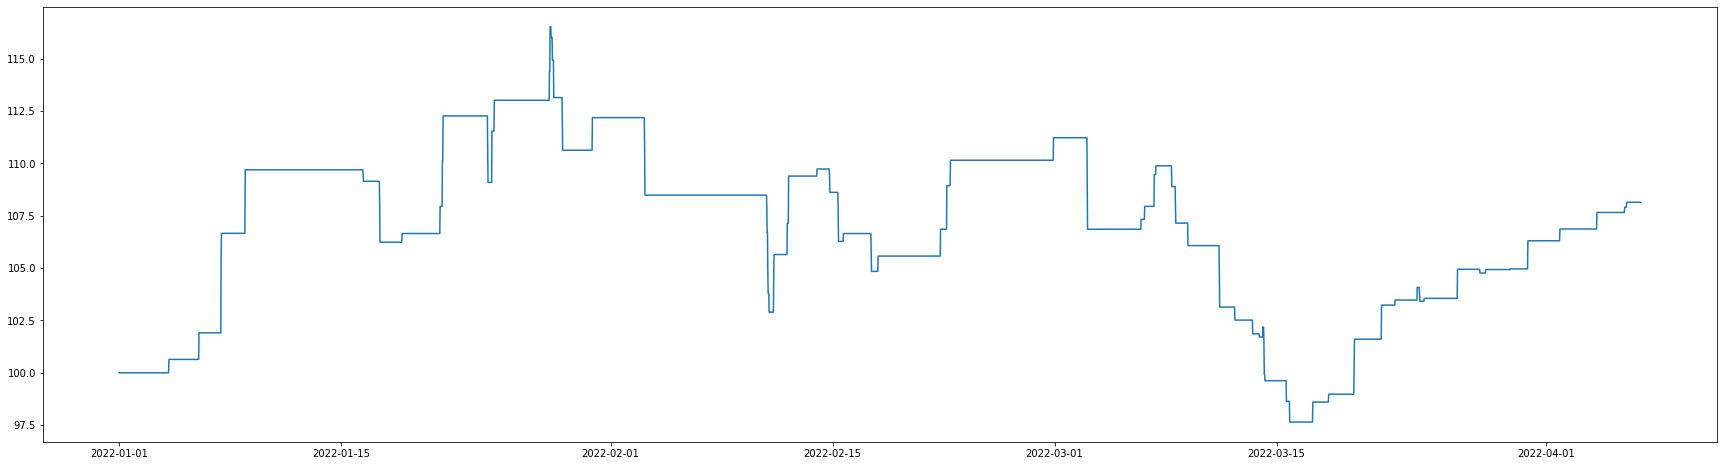

In [18]:
if reinvest_profit_flag == True:
    fig, ax = plt.subplots(figsize=(30, 8))
    ax.plot(budget_dict['time'], budget_dict['budget'])
else:
    print("Not reinvest profit")

In [19]:
if reinvest_profit_flag == True:
    print(f"Max drawdown: {round(max_drawdown * 100, 2)}%")

Max drawdown: 8.21%


In [20]:
win_rate = len(transaction_df[transaction_df['profit'] > 0]) / len(transaction_df)
print(f"Win rate: {round(win_rate * 100, 2)}%")

Win rate: 49.02%


In [21]:
for symbol in transaction_df['symbol'].unique():
    symbol_df = transaction_df[transaction_df['symbol'] == symbol]
    win_rate = len(symbol_df[symbol_df['profit'] > 0]) / len(symbol_df)
    print(f"{symbol} win rate: {round(win_rate * 100, 2)}%")

ETH-PERP win rate: 36.11%
LUNA-PERP win rate: 55.88%
SOL-PERP win rate: 56.25%


In [22]:
print(f"Distribution")
print(pd.DataFrame(transaction_df['profit_percent'].describe()))

Distribution
       profit_percent
count      102.000000
mean        -0.154062
std          3.747075
min         -8.335690
25%         -3.263745
50%         -0.456986
75%          2.200838
max         11.915476


In [23]:
for symbol in transaction_df['symbol'].unique():
    temp_return = transaction_df[transaction_df['symbol'] == symbol]['profit_percent']
    
    print(f"Distribution {symbol}:")
    print(pd.DataFrame(temp_return.describe()))
    print("\n")

Distribution ETH-PERP:
       profit_percent
count       36.000000
mean        -0.799637
std          2.763623
min         -5.466068
25%         -2.553237
50%         -1.353783
75%          0.843818
max          8.286675


Distribution LUNA-PERP:
       profit_percent
count       34.000000
mean         0.276969
std          4.215182
min         -6.055943
25%         -3.349297
50%          0.730752
75%          3.104466
max         11.915476


Distribution SOL-PERP:
       profit_percent
count       32.000000
mean         0.114241
std          4.176823
min         -8.335690
25%         -3.924478
50%          0.544390
75%          2.622171
max          8.742758




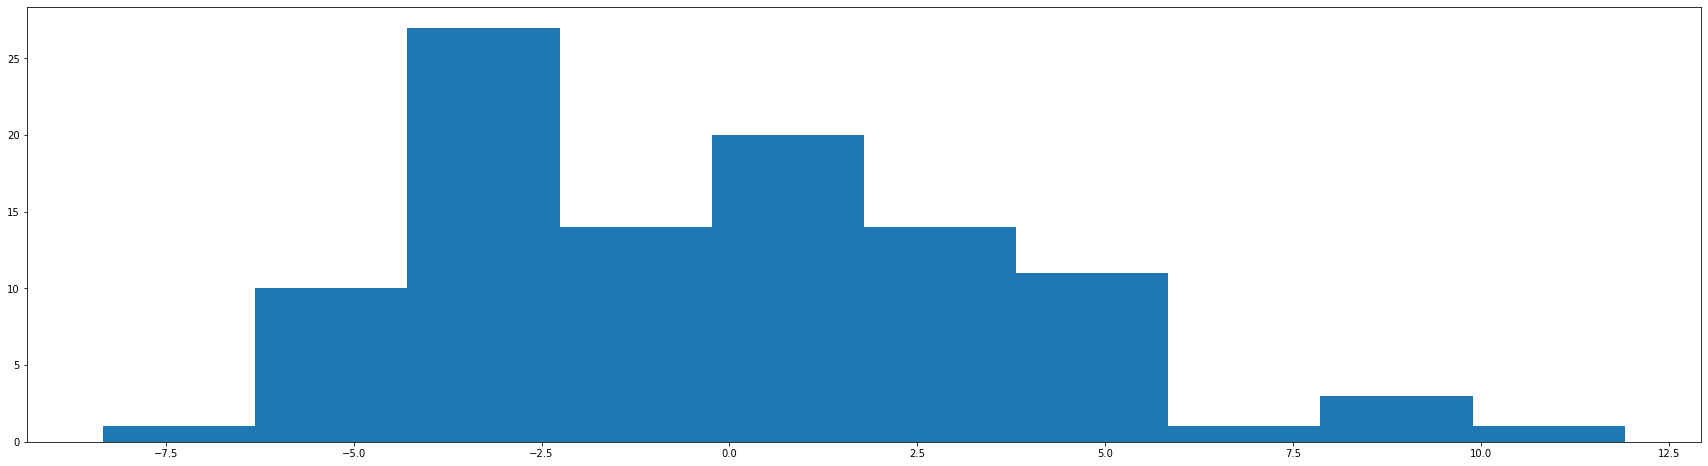

In [24]:
fig, ax = plt.subplots(figsize=(30, 8))
_ = ax.hist(transaction_df['profit_percent'], bins=10)